In [165]:
using Images, ImageView
using FileIO

In [166]:
#leitura
img = load("../peppers.png");
#transformando de RGB para HSV
hsv = HSV.(img);

In [167]:
#channelview permite que acessemos os canais atraves da sintaxe matricial
#rgb[1,:,:,] <- RED
#rgb[2,:,:,] <- GREN
#rgb[3,:,:,]  <- BLUE
M = channelview(hsv);
rgb = channelview(img);

In [168]:
#aplicando a mascara
#pegando apenas valores maiores entre [0, 10] no hue ou  maiores que 240
#pegando apenas os valores maiores que 0.5 no saturation e value
mask = (M[1,:,:] .>= 50 .&& M[1,:,:] .<= 180) .&& (M[2,:,:] .>= 0.05) .&&  (M[3,:,:] .>= 0.01);

In [169]:
G = M

G[1,:,:] = rgb[1,:,:].*mask
G[2,:,:] = rgb[2,:,:].*mask
G[3,:,:] = rgb[3,:,:].*mask;

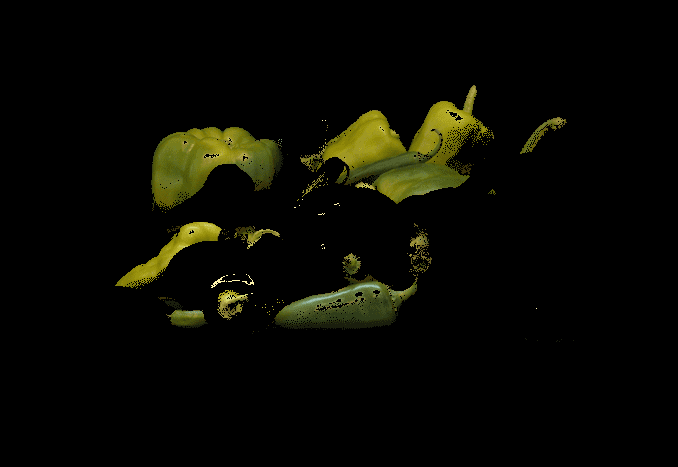

In [170]:
H = colorview(RGB,G)
#save("../apenas_verd_ruim.png", H)

In [171]:
tam=12;
se = ones(tam, tam);
filtro = imfilter(float.(mask), se);
#dilatar
dil_img = filtro.> 0.5
#erodir
ero_img = filtro.>= (tam*tam)-1
#logo, para fechar os buracos precisa fazer uma operação de fechamento, ou
#seja, dilatação seguida de erosão


467×678 BitMatrix:
 0  0  0  0  0  0  0  0  0  0  0  0  0  …  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0  …  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 ⋮              ⋮              ⋮        ⋱              ⋮              ⋮     
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  

In [172]:
tam = 12;
#dilatar
filtro = imfilter(float.(mask), se);
dil_img = filtro.> 0.6
#erodir
filtro = imfilter(float.(dil_img), se);
ero_img = filtro.>= (tam*tam)-1
G[1,:,:] = rgb[1,:,:].*ero_img
G[2,:,:] = rgb[2,:,:].*ero_img
G[3,:,:] = rgb[3,:,:].*ero_img

467×678 Array{N0f8,2} with eltype N0f8:
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 ⋮                        ⋮              ⋱                      ⋮         
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0

In [175]:
G = colorview(RGB,G)
save("../apenas_verd_melhor.png", G)